<a href="https://colab.research.google.com/github/alammobaDar/CCADMACL_PROJECT_COM231ML/blob/main/CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

## Load Dataset

In [2]:
drive.mount("/content/drive")

path = "/content/drive/My Drive/Datasets/new_flows_sampled_2000.csv"

df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df.head()

,packet_count,byte_count,avg_pkt_len,start_time,end_time,first_ip_src,flow_duration,avg_iat_micros,bytes_out,bytes_in,...,p2_len,p3_len,p4_len,p5_len,small_iat_count,ip_src,ip_dst,src_port,dst_port,proto
0,1,83.0,83.0,1.744194e+09,1.744194e+09,61.83.158.76,0.000000,0,83.0,0.0,...,0.0,0.0,0.0,0.0,0.0,192.14.235.117,61.83.158.76,53.0,24395.0,17.0
1,1,140.0,140.0,1.744194e+09,1.744194e+09,109.222.152.100,0.000000,0,140.0,0.0,...,0.0,0.0,0.0,0.0,0.0,109.222.152.100,150.67.111.23,16834.0,52299.0,17.0
2,2,200.0,100.0,1.744194e+09,1.744194e+09,157.173.5.196,68843.841553,34421,200.0,0.0,...,140.0,0.0,0.0,0.0,0.0,157.173.5.196,211.183.178.66,80.0,53708.0,17.0
3,1,60.0,60.0,1.744194e+09,1.744194e+09,110.200.192.171,0.000000,0,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,110.200.192.171,163.164.65.35,3702.0,56696.0,17.0
4,2,443.0,221.5,1.744194e+09,1.744194e+09,202.152.194.3,3175.020218,1587,111.0,332.0,...,332.0,0.0,0.0,0.0,1.0,202.152.194.3,205.96.59.116,53.0,60142.0,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   packet_count     2000 non-null   int64  
 1   byte_count       2000 non-null   float64
 2   avg_pkt_len      2000 non-null   float64
 3   start_time       2000 non-null   float64
 4   end_time         2000 non-null   float64
 5   first_ip_src     2000 non-null   object 
 6   flow_duration    2000 non-null   float64
 7   avg_iat_micros   2000 non-null   int64  
 8   bytes_out        2000 non-null   float64
 9   bytes_in         2000 non-null   float64
 10  payload_ratio    2000 non-null   float64
 11  p1_len           2000 non-null   float64
 12  p2_len           2000 non-null   float64
 13  p3_len           2000 non-null   float64
 14  p4_len           2000 non-null   float64
 15  p5_len           2000 non-null   float64
 16  small_iat_count  2000 non-null   float64
 17  ip_src        

In [5]:
df.describe()

,packet_count,byte_count,avg_pkt_len,start_time,end_time,flow_duration,avg_iat_micros,bytes_out,bytes_in,payload_ratio,p1_len,p2_len,p3_len,p4_len,p5_len,small_iat_count,src_port,dst_port,proto
count,2000.000000,2.000000e+03,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.026000,1.390017e+03,117.694818,1.744194e+09,1.744194e+09,1.179462e+06,2.083988e+05,1.063523e+03,326.494500,0.262909,105.869000,29.648500,22.961500,14.535500,9.272000,1.312500,6280.560500,43094.993500,11.500000
std,31.288141,3.476202e+04,180.813710,1.811420e+01,1.811992e+01,6.723783e+06,1.423842e+06,3.255434e+04,11788.441881,1.353561,160.468589,144.304334,211.432928,129.295086,72.176365,29.601063,11133.543993,15487.627406,5.501376
min,1.000000,5.400000e+01,54.000000,1.744194e+09,1.744194e+09,0.000000e+00,0.000000e+00,5.400000e+01,0.000000,0.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,443.000000,6.000000
25%,1.000000,5.800000e+01,58.000000,1.744194e+09,1.744194e+09,0.000000e+00,0.000000e+00,5.800000e+01,0.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,34072.000000,6.000000
50%,1.000000,8.200000e+01,74.000000,1.744194e+09,1.744194e+09,0.000000e+00,0.000000e+00,7.800000e+01,0.000000,0.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,443.000000,46641.000000,11.500000
75%,1.000000,1.140000e+02,99.000000,1.744194e+09,1.744194e+09,0.000000e+00,0.000000e+00,1.030000e+02,0.000000,0.000000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8083.500000,55644.000000,17.000000
max,1257.000000,1.446599e+06,1992.412500,1.744194e+09,1.744194e+09,6.199690e+07,2.259668e+07,1.446599e+06,526464.000000,29.928031,1392.000000,3594.000000,4485.000000,2714.000000,1304.000000,1235.000000,62327.000000,65525.000000,17.000000


In [6]:
df.isna().sum()

,0
packet_count,0
byte_count,0
avg_pkt_len,0
start_time,0
end_time,0
first_ip_src,0
flow_duration,0
avg_iat_micros,0
bytes_out,0
bytes_in,0


In [61]:
# Remove object types

X = df.drop(["ip_src", "ip_dst", "start_time", "end_time", "src_port", "dst_port", "proto", "first_ip_src"], axis=1)

In [62]:
X.head()

,packet_count,byte_count,avg_pkt_len,flow_duration,avg_iat_micros,bytes_out,bytes_in,payload_ratio,p1_len,p2_len,p3_len,p4_len,p5_len,small_iat_count
0,1,83.0,83.0,0.000000,0,83.0,0.0,0.000000,83.0,0.0,0.0,0.0,0.0,0.0
1,1,140.0,140.0,0.000000,0,140.0,0.0,0.000000,140.0,0.0,0.0,0.0,0.0,0.0
2,2,200.0,100.0,68843.841553,34421,200.0,0.0,0.000000,60.0,140.0,0.0,0.0,0.0,0.0
3,1,60.0,60.0,0.000000,0,60.0,0.0,0.000000,60.0,0.0,0.0,0.0,0.0,0.0
4,2,443.0,221.5,3175.020218,1587,111.0,332.0,2.964286,111.0,332.0,0.0,0.0,0.0,1.0


## Initial visualisation of the dataset

<Axes: >

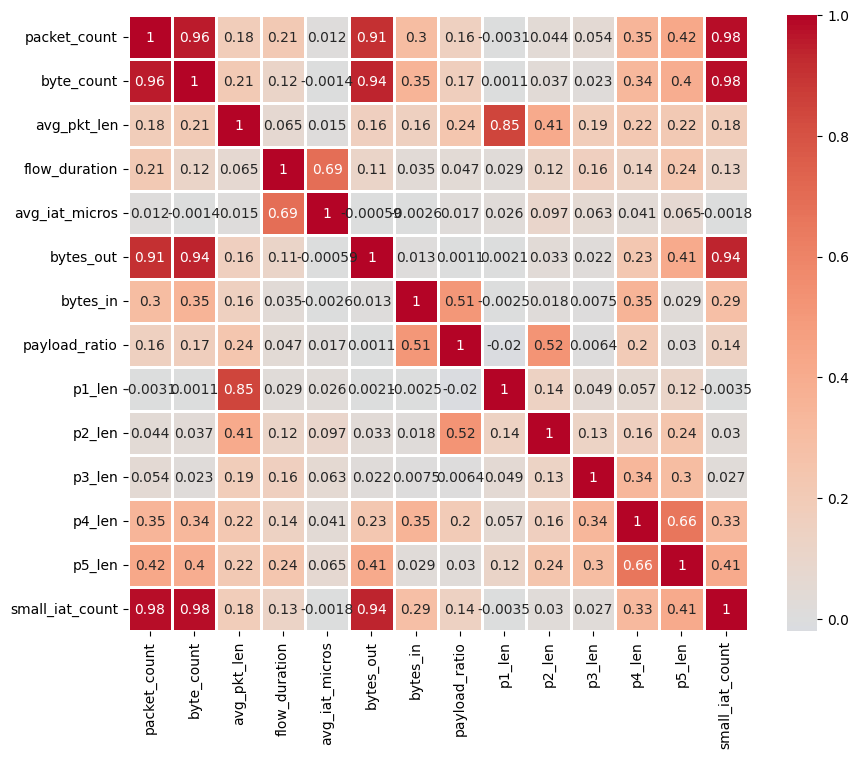

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), cmap="coolwarm", center=0, annot=True, linewidths=2)

In [10]:
# sns.pairplot(X)

In [64]:
X = X.drop(["byte_count"], axis=1)

## Scale Data

### Standard Scaler

In [65]:
sscaler = StandardScaler()
X_sscaled = sscaler.fit_transform(X)

X_sscaled = pd.DataFrame(X_sscaled, columns=X.columns)

In [66]:
X_sscaled.head()

,packet_count,avg_pkt_len,flow_duration,avg_iat_micros,bytes_out,bytes_in,payload_ratio,p1_len,p2_len,p3_len,p4_len,p5_len,small_iat_count
0,-0.064769,-0.191930,-0.175460,-0.146400,-0.030127,-0.027703,-0.194284,-0.142550,-0.205510,-0.108627,-0.112449,-0.128495,-0.044351
1,-0.064769,0.123391,-0.175460,-0.146400,-0.028376,-0.027703,-0.194284,0.212749,-0.205510,-0.108627,-0.112449,-0.128495,-0.044351
2,-0.032800,-0.097887,-0.165219,-0.122219,-0.026532,-0.027703,-0.194284,-0.285916,0.764905,-0.108627,-0.112449,-0.128495,-0.044351
3,-0.064769,-0.319164,-0.175460,-0.146400,-0.030834,-0.027703,-0.194284,-0.285916,-0.205510,-0.108627,-0.112449,-0.128495,-0.044351
4,-0.032800,0.574244,-0.174988,-0.145285,-0.029267,0.000467,1.996254,0.031983,2.095759,-0.108627,-0.112449,-0.128495,-0.010560


### Robust Scaler

In [67]:
rscaler = RobustScaler()
X_rscaled = rscaler.fit_transform(X)

X_rscaled = pd.DataFrame(X_rscaled, columns=X.columns)

In [68]:
X_rscaled.head()

,packet_count,avg_pkt_len,flow_duration,avg_iat_micros,bytes_out,bytes_in,payload_ratio,p1_len,p2_len,p3_len,p4_len,p5_len,small_iat_count
0,0.0,0.219512,0.000000,0.0,0.111111,0.0,0.000000,0.257143,0.0,0.0,0.0,0.0,0.0
1,0.0,1.609756,0.000000,0.0,1.377778,0.0,0.000000,1.885714,0.0,0.0,0.0,0.0,0.0
2,1.0,0.634146,68843.841553,34421.0,2.711111,0.0,0.000000,-0.400000,140.0,0.0,0.0,0.0,0.0
3,0.0,-0.341463,0.000000,0.0,-0.400000,0.0,0.000000,-0.400000,0.0,0.0,0.0,0.0,0.0
4,1.0,3.597561,3175.020218,1587.0,0.733333,332.0,2.964286,1.057143,332.0,0.0,0.0,0.0,1.0


# PCA IMPLEMENTATION

In [69]:
def reduce_dimensions(X, n_components, is2_dim=True):
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)

    print("Number of components kept:", pca.n_components_)
    print("Explained variance ratio:", pca.explained_variance_ratio_)
    print("Total variance retained:", sum(pca.explained_variance_ratio_))

    if is2_dim:
      loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
      loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)
      print(loading_matrix)

    else:
      loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
      loading_matrix = pd.DataFrame(loadings, columns=[f"PC{i}" for i in range(pca.n_components_)], index=X.columns)
      print(loading_matrix)

    return X_reduced

def visualize_reduced_data(X, X_reduced, is2_dim=True):
    plt.figure(figsize=(10, 8))
    sns.heatmap(X.corr(), annot=True, cmap="coolwarm")



    if is2_dim:
      fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

      ax2.scatter(X_reduced[:,0], X_reduced[:,1])
      ax2.set_title("Scatter plot of reduced data")
      ax2.set_xlabel("PC1")
      ax2.set_ylabel("PC2")

    else:
      fig, ax1 = plt.subplots(1, 1, figsize=(20, 6))

    ax1.boxplot(X, tick_labels=X.columns)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    ax1.set_title("Box Plot of scaled data")
    ax1.set_xlabel("Features")
    ax1.set_ylabel("Values")

    plt.show()

## PCA (Standard Scaler)

In [70]:
X_sscaled_reduced= reduce_dimensions(X_sscaled, 2)

Number of components kept: 2
Explained variance ratio: [0.28780102 0.16387499]
Total variance retained: 0.4516760109063588
                      PC1       PC2
packet_count     0.879825 -0.401758
avg_pkt_len      0.448311  0.685467
flow_duration    0.315744  0.174448
avg_iat_micros   0.129992  0.208837
bytes_out        0.791706 -0.472969
bytes_in         0.369662  0.120560
payload_ratio    0.318605  0.393621
p1_len           0.200456  0.619984
p2_len           0.302191  0.585935
p3_len           0.254938  0.285085
p4_len           0.622059  0.177340
p5_len           0.671526  0.085428
small_iat_count  0.867330 -0.430382


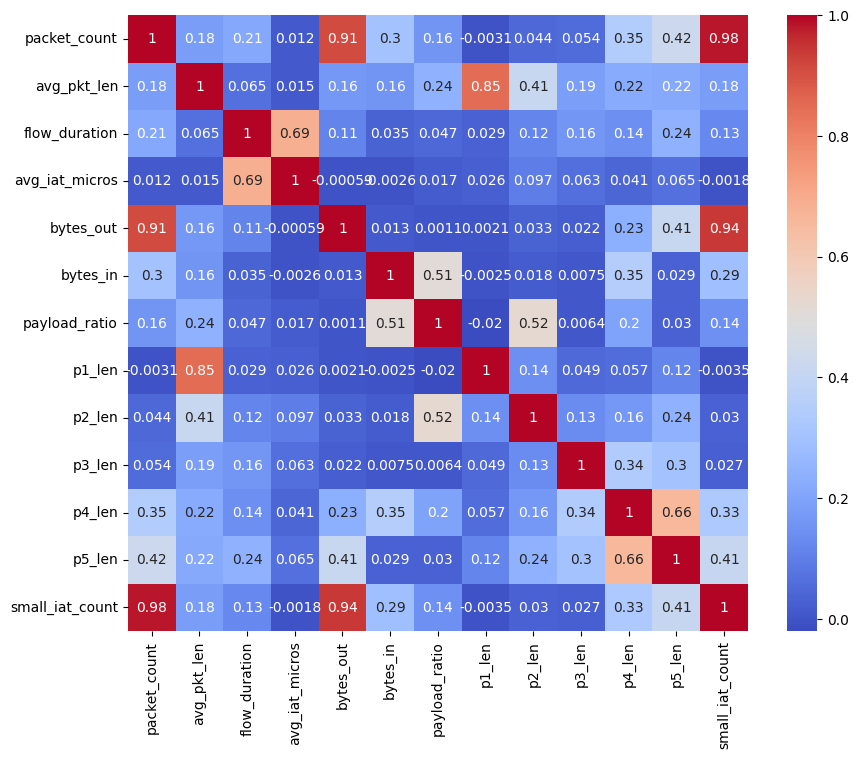

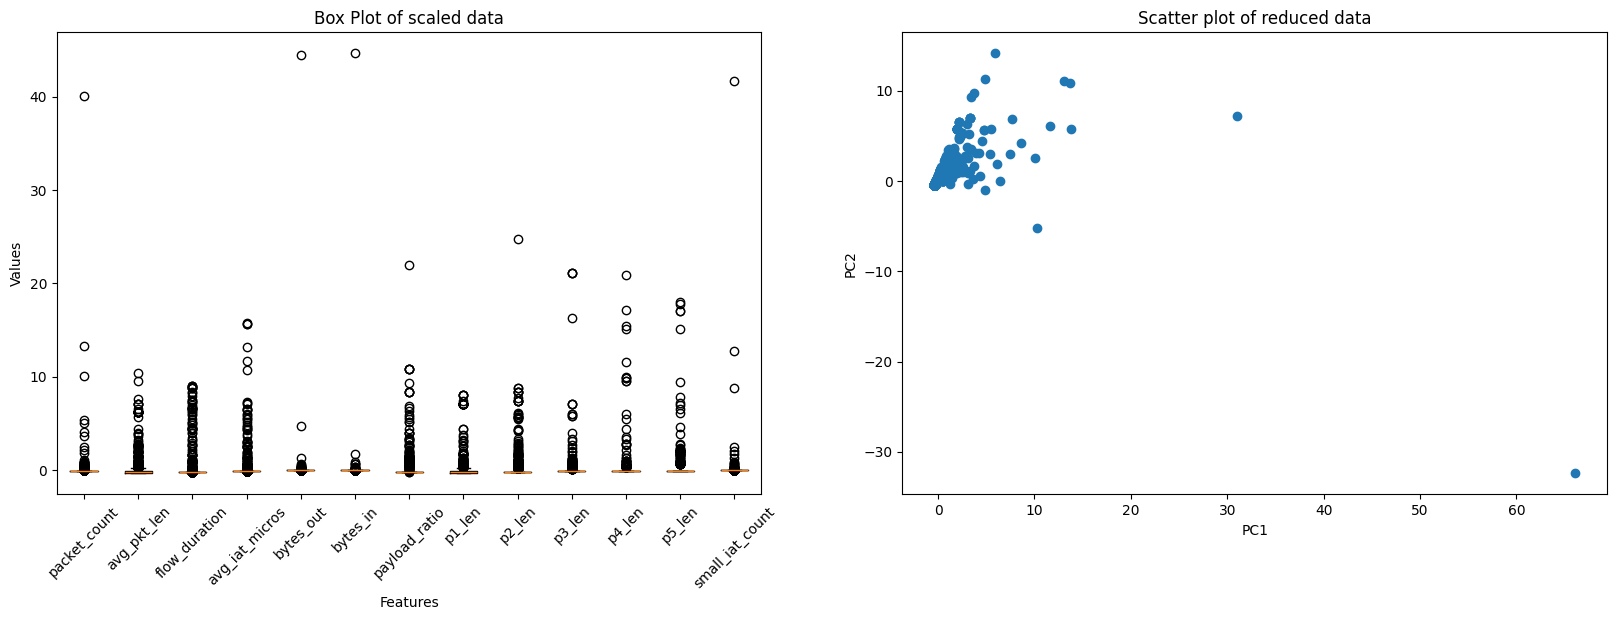

In [71]:
visualize_reduced_data(X_sscaled, X_sscaled_reduced)

## PCA (Robust Scaler)

In [73]:
X_rscaled_reduced = reduce_dimensions(X_rscaled, 2)

Number of components kept: 2
Explained variance ratio: [0.97781928 0.02217777]
Total variance retained: 0.9999970530100508
                          PC1           PC2
packet_count     6.537330e+00 -5.923088e+00
avg_pkt_len      2.838172e-01 -1.862762e-01
flow_duration    6.722092e+06 -1.507866e+05
avg_iat_micros   1.001228e+06  1.012358e+06
bytes_out        7.908012e+01 -7.881297e+01
bytes_in         4.035612e+02 -4.427742e+02
payload_ratio    6.338700e-02 -3.028305e-02
p1_len           1.326531e-01  3.335890e-02
p2_len           1.725671e+01  2.600984e+00
p3_len           3.347016e+01 -1.441757e+01
p4_len           1.814417e+01 -1.055599e+01
p5_len           1.721281e+01 -1.042384e+01
small_iat_count  3.664827e+00 -3.700473e+00


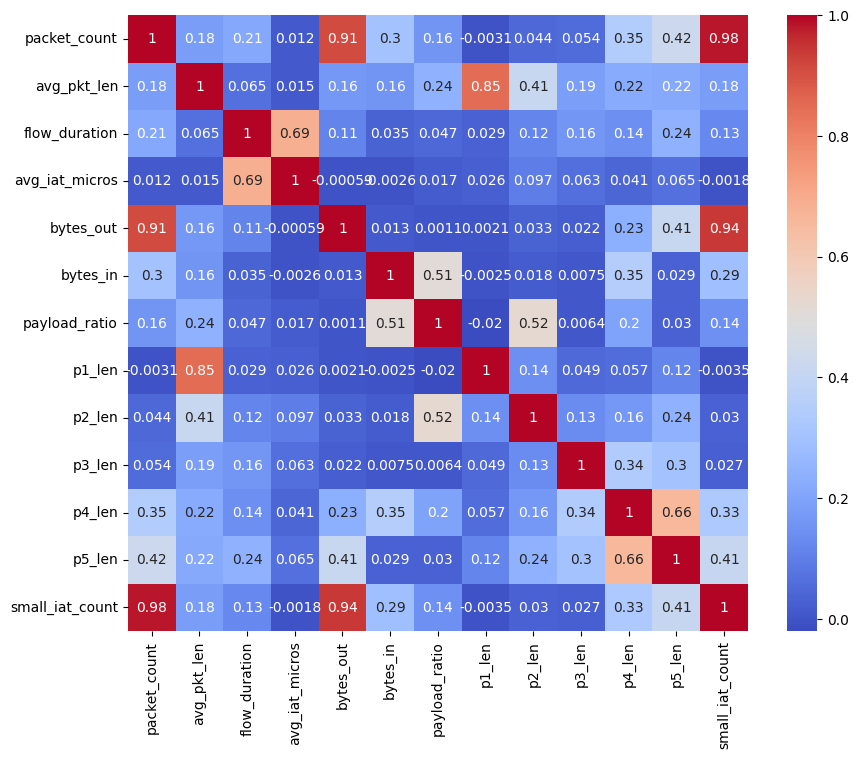

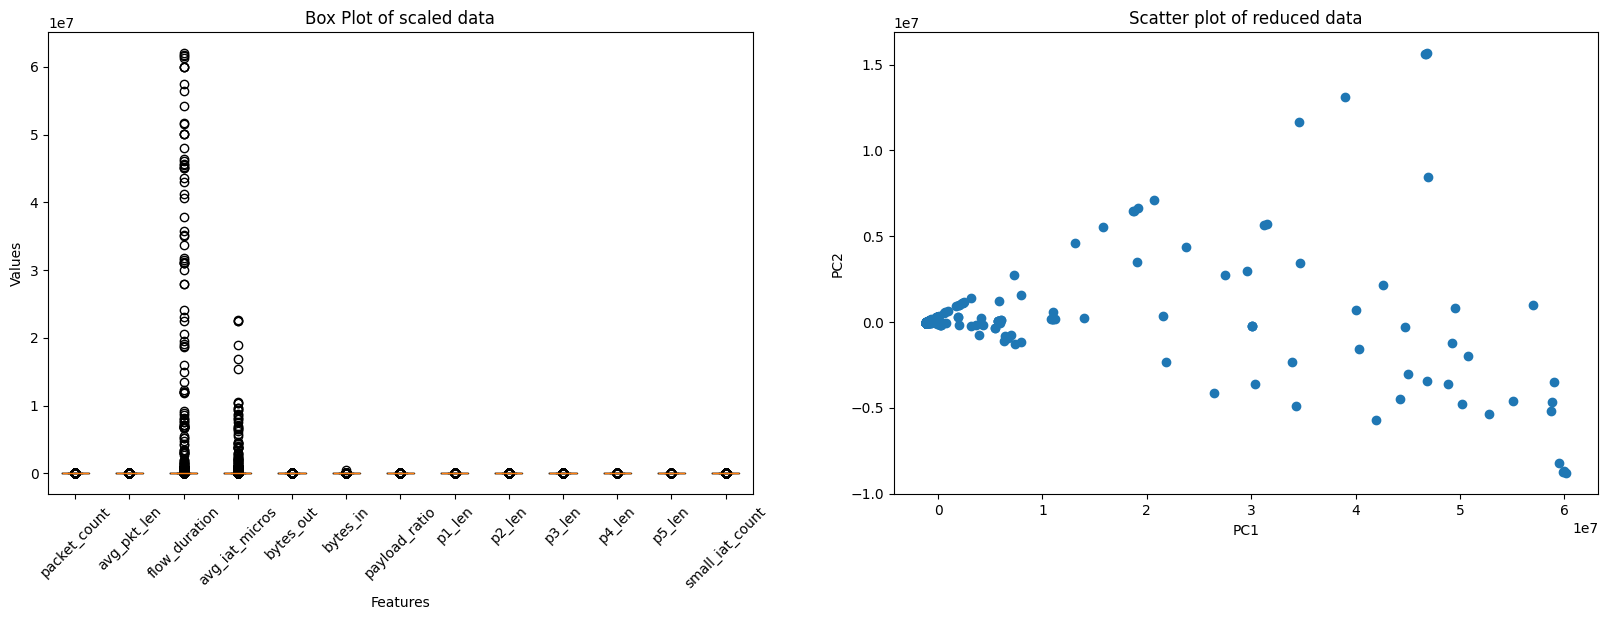

In [74]:
visualize_reduced_data(X_rscaled, X_rscaled_reduced)

***Based on the results of base PCA with Standard / Robust Scaler is not reliable for our datasets we are going to try to work around with PCA***

# PCA Workaround

In [76]:
# Log Transform

x_log = np.log1p(X)
x_log = pd.DataFrame(x_log, columns=X.columns)

x_log_sscaled = sscaler.fit_transform(x_log)
x_log_sscaled = pd.DataFrame(x_log_sscaled, columns=X.columns)
x_log_sscaled_reduced = reduce_dimensions(x_log_sscaled, 0.9, is2_dim=False)

# visualize_reduced_data(x_log, x_log_sscaled_reduced, is2_dim=False)

x_log_rscaled = rscaler.fit_transform(x_log)
x_log_rscaled = pd.DataFrame(x_log_rscaled, columns=X.columns)
x_log_rscaled_reduced = reduce_dimensions(x_log_rscaled, 0.95, is2_dim=False)

# visualize_reduced_data(x_log, x_log_rscaled_reduced, is2_dim=False)

Number of components kept: 4
Explained variance ratio: [0.57467297 0.1630714  0.14096192 0.05541052]
Total variance retained: 0.9341168140210512
                      PC0       PC1       PC2       PC3
packet_count     0.925488  0.016569 -0.252831  0.126928
avg_pkt_len      0.426537  0.726033  0.496429  0.074669
flow_duration    0.902595 -0.209509  0.073709 -0.352014
avg_iat_micros   0.868001 -0.232443  0.115451 -0.407608
bytes_out        0.751875  0.630067 -0.090213 -0.009576
bytes_in         0.674362 -0.398019  0.508280  0.276290
payload_ratio    0.557792 -0.418949  0.631911  0.253009
p1_len           0.179886  0.818505  0.471898 -0.101163
p2_len           0.858544 -0.255900  0.319500 -0.210585
p3_len           0.853445 -0.034277 -0.301372 -0.113575
p4_len           0.837281  0.097412 -0.425874  0.083427
p5_len           0.812937  0.136486 -0.459256  0.090081
small_iat_count  0.822786  0.004147 -0.174980  0.431227
Number of components kept: 3
Explained variance ratio: [0.84085414 0.06

 ***We are going to use Robust Scaler here since it has better spread than Standard Scaler***

## KMEANS Implementation

In [77]:
def elbow_method(X):
  wcss = []
  sse = {}
  for i in range(1, 11):
      kmeans =  KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
      kmeans.fit(X)

      wcss.append(kmeans.inertia_)
      sse[i] = kmeans.inertia_
      print(f"For cluster = {i}, SSE/WCSS is {sse[i]}")

  plt.plot(range(1, 11), wcss)
  plt.title("Elbow method")
  plt.xlabel("Number of cluster")
  plt.ylabel("WCSS")
  plt.show()

def handle_kmeans(X, n_clusters):
  kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
  clusters = kmeans.fit_predict(X)

  return kmeans, clusters

def kmeans_metrics(X, clusters):
  silhouette_avg = silhouette_score(X, clusters)
  dbs = davies_bouldin_score(X, clusters)
  chs = calinski_harabasz_score(X, clusters)

  print(f"Silhouette Score: {silhouette_avg}")
  print(f"Davies-Bouldin Score: {dbs}")
  print(f"Calinski-Harabasz Score: {chs}")

For cluster = 1, SSE/WCSS is 103881.68879927261
For cluster = 2, SSE/WCSS is 18511.72588311708
For cluster = 3, SSE/WCSS is 11612.905525817643
For cluster = 4, SSE/WCSS is 8625.83718633824
For cluster = 5, SSE/WCSS is 6474.744026930192
For cluster = 6, SSE/WCSS is 5113.1224128638905
For cluster = 7, SSE/WCSS is 4111.068120954065
For cluster = 8, SSE/WCSS is 3244.859375956771
For cluster = 9, SSE/WCSS is 2834.4606303631745
For cluster = 10, SSE/WCSS is 2437.4426048377336


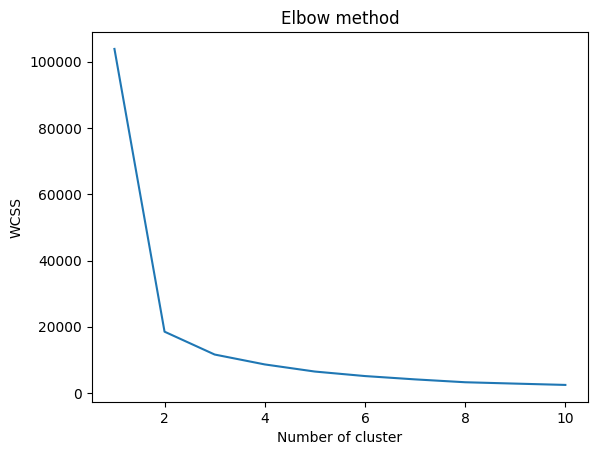

In [78]:
elbow_method(x_log_rscaled_reduced)

In [79]:
# Robust Scaler
rkmeans, rcluster = handle_kmeans(x_log_rscaled_reduced, 4)

kmeans_metrics(x_log_rscaled_reduced, rcluster)

Silhouette Score: 0.753699310400033
Davies-Bouldin Score: 0.7062445750752447
Calinski-Harabasz Score: 7347.332427455883


In [80]:
# Standard Scaler
skmeans, scluster = handle_kmeans(x_log_sscaled_reduced, 5)

kmeans_metrics(x_log_sscaled_reduced, scluster)

Silhouette Score: 0.7545606020495469
Davies-Bouldin Score: 0.7981704512822526
Calinski-Harabasz Score: 2250.760815693396


In [81]:
X["cluster"] = rcluster

X["cluster"].value_counts()


,count
cluster,
2,1608
1,167
3,145
0,80


In [82]:
import plotly.express as px


px.scatter_3d(x_log_rscaled_reduced,
              x=x_log_rscaled_reduced[:,0],
              y=x_log_rscaled_reduced[:,1],
              z=x_log_rscaled_reduced[:,2],
              color=rcluster,
              # size=X["flow_duration"],

              )

In [83]:
# Check the 'Behavioral DNA' of each cluster
profile = X.groupby('cluster').agg({
    'byte_count': 'mean',
    'small_iat_count': 'mean',
    'payload_ratio': 'mean',
    'p1_len': 'mean'
}).round(2)

print(profile)

KeyError: "Column(s) ['byte_count'] do not exist"

***Insights:*** *we won't test Standard Scaler anymore and we will use Robust Scaler*

## DBSCAN Implementation

In [35]:
def knee_method(X):
  nn = NearestNeighbors(n_neighbors=10)
  nn.fit(X)
  distances, indices = nn.kneighbors(X)

  distab = np.sort(distances, axis=0)
  distab = distab[:, 3]
  plt.figure(figsize=(10,8))
  plt.plot(distab)

  return distab

def check_optimal_eps(distab):
  x = np.arange(len(distab))
  y = distab

  x1, y1 = x[0], y[0]
  x2, y2 = x[-1], y[-1]

  numerator = np.abs((y2 - y1) * x - (x2 - x1) * y + x2*y1 - y2*x1)
  denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)

  distances_to_line = numerator / denominator

  elbow_idx = np.argmax(distances_to_line)
  elbow_value = y[elbow_idx]

  print("Optimal eps:", elbow_value)

  return elbow_value

def check_optimal_min_samples(X, eps):
  min_samples=range(1,15)
  ep = eps
  for min_sample in min_samples:
      db = DBSCAN(eps=ep, min_samples=min_sample, metric="euclidean")
      db.fit(X)
      labels = db.labels_
      n_noise = list(labels).count(-1)
      n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
      print(f"min_samples={min_sample}: clusters={n_clusters}: noise points={n_noise}")


Optimal eps: 0.18957442524104492
min_samples=1: clusters=237: noise points=0
min_samples=2: clusters=45: noise points=192
min_samples=3: clusters=23: noise points=236
min_samples=4: clusters=17: noise points=254
min_samples=5: clusters=14: noise points=270
min_samples=6: clusters=11: noise points=287
min_samples=7: clusters=9: noise points=305
min_samples=8: clusters=7: noise points=320
min_samples=9: clusters=6: noise points=335
min_samples=10: clusters=5: noise points=344
min_samples=11: clusters=4: noise points=354
min_samples=12: clusters=4: noise points=354
min_samples=13: clusters=4: noise points=354
min_samples=14: clusters=4: noise points=354


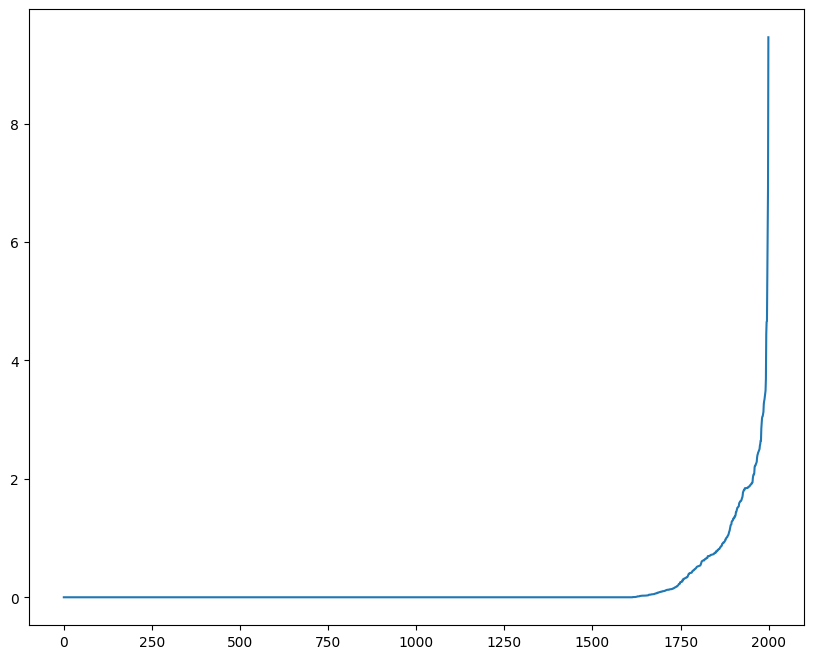

In [36]:
distab = knee_method(x_log_rscaled_reduced)

eps = check_optimal_eps(distab)

check_optimal_min_samples(x_log_rscaled_reduced, eps)

In [40]:
db = DBSCAN(eps=eps, min_samples=14, metric="euclidean")
db.fit(x_log_rscaled_reduced)
labels = db.labels_

X["cluster"] = db.labels_

print(X["cluster"].value_counts())

cluster
 0    1255
-1     354
 3     346
 1      24
 2      21
Name: count, dtype: int64


In [41]:
px.scatter_3d(x_log_rscaled_reduced,
              x=x_log_rscaled_reduced[:,0],
              y=x_log_rscaled_reduced[:,1],
              z=x_log_rscaled_reduced[:,2],
              color=X["cluster"],
              size=X["flow_duration"],

              )

# UMAP Implementation

In [31]:
import umap

X_umap = umap.UMAP(
    n_neighbors=30,
    min_dist=0.05,
    n_components=2,
    random_state=42,
    n_jobs=1
).fit_transform(X_rscaled_reduced)



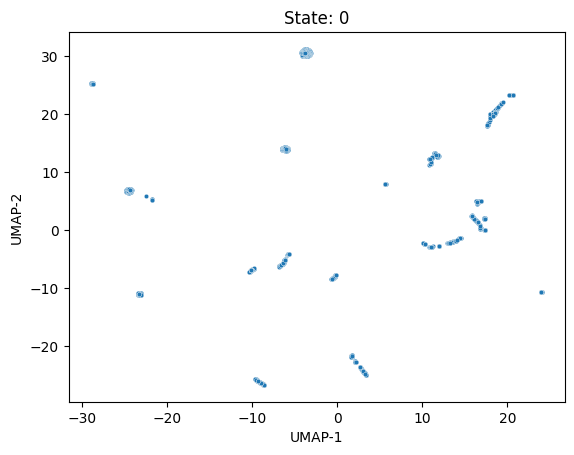

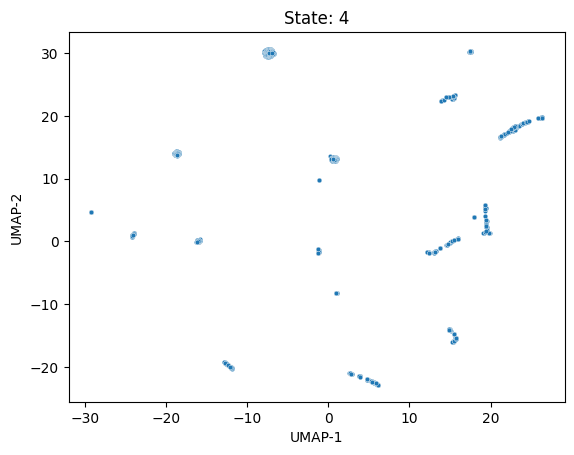

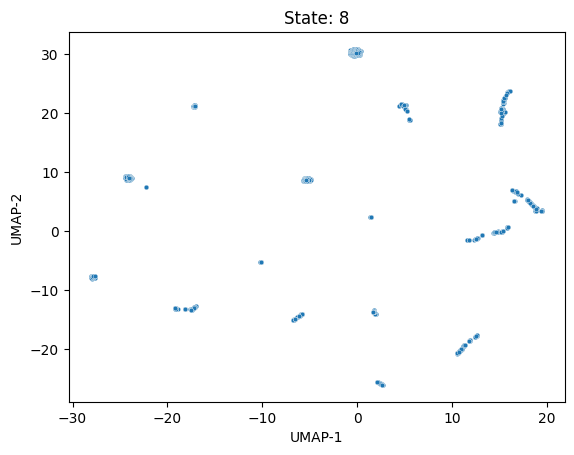

KeyboardInterrupt: 

In [32]:
states = list(range(0, 42, 4))

def test_umap_consistency(states):
  for state in states:
    X_umap = umap.UMAP(
      n_neighbors=30,
      min_dist=0.05,
      n_components=2,
      random_state=state,
      n_jobs=1
    ).fit_transform(X_sscaled_reduced)

    sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], s=10)
    plt.title(f"State: {state}")
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.show()

test_umap_consistency(states)

In [ ]:
from sklearn.manifold import trustworthiness

score = trustworthiness(X_sscaled_reduced, X_umap, n_neighbors=30)
print(score)

In [ ]:

umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])

corr = pd.concat([X, umap_df], axis=1).corr()
corr.loc[X.columns, ['UMAP1', 'UMAP2']]

In [ ]:
sns.scatterplot(x=umap_df['UMAP1'], y=umap_df['UMAP2'], hue=X['flow_duration'], palette='viridis')
plt.title("UMAP Colored by Flow Duration")
plt.show()

### Lets try to use DBSCAN and HDBSCAN

In [ ]:
hdb = HDBSCAN()

hdb_clusters = hdb.fit_predict(x_log_rscaled_reduced)


### DBSCAN

In [ ]:
nn = NearestNeighbors(n_neighbors=4)
nn.fit(umap_df)
distances, indices = nn.kneighbors(umap_df)

distab = np.sort(distances, axis=0)
distab = distab[:, 3]
plt.figure(figsize=(10,8))
plt.plot(distab)

In [ ]:
x = np.arange(len(distab))
y = distab

x1, y1 = x[0], y[0]
x2, y2 = x[-1], y[-1]

numerator = np.abs((y2 - y1) * x - (x2 - x1) * y + x2*y1 - y2*x1)
denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)

distances_to_line = numerator / denominator

elbow_idx = np.argmax(distances_to_line)
elbow_value = y[elbow_idx]

print("Optimal eps:", elbow_value)

In [ ]:
min_samples=range(1,15)
ep = 2
for min_sample in min_samples:
    db = DBSCAN(eps=ep, min_samples=min_sample, metric="euclidean")
    db.fit(umap_df)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"min_samples={min_sample}: clusters={n_clusters}")



In [ ]:
db = DBSCAN(eps=0.6, min_samples=14, metric="euclidean")
db.fit(umap_df)
labels = db.labels_
n_noise = list(labels).count(-1)
print(f"noise points={n_noise}")



In [ ]:


umap_df['cluster'] = db.labels_



In [ ]:
umap_df.head()


In [ ]:
umap_df["cluster"].value_counts()

In [ ]:
df["cluster"] = db.labels_

df.head()

In [ ]:
# 1. Add the labels to your UMAP DataFrame

# 2. Create a color palette where noise (-1) is black/gray
unique_labels = sorted(umap_df['cluster'].unique())
# Use a bright palette for clusters
colors = sns.color_palette("viridis", len(unique_labels))
color_dict = {label: colors[i] for i, label in enumerate(unique_labels)}

# 3. Plotting
plt.figure(figsize=(10, 8))

# Use different markers for noise vs clusters for even better clarity
sns.scatterplot(
    x=umap_df['UMAP1'],
    y=umap_df['UMAP2'],
    hue=umap_df['cluster'],
    palette=color_dict,
    style=(umap_df['cluster'] == -1), # X for noise, O for clusters
    markers={True: 'X', False: 'o'},
    alpha=0.7,
    s=30
)

plt.title(f"DBSCAN Clusters on UMAP Projection\n(eps={0.6}, min_samples={5})")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")

# Move legend outside the plot
plt.legend(title='Cluster ID\n(-1 = Noise)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()